In [19]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [42]:
tb=pd.read_csv(r"C:\Users\Lucky Prem\Downloads\Churn_Modelling.csv")
tb

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Data CLeaning

In [43]:
tb_new=tb[['Geography','Gender','Age','Exited']]
tb_new

,Geography,Gender,Age,Exited
0,France,Female,42,1
1,Spain,Female,41,0
2,France,Female,42,1
3,France,Female,39,0
4,Spain,Female,43,0
...,...,...,...,...
9995,France,Male,39,0
9996,France,Male,35,0
9997,France,Female,36,1
9998,Germany,Male,42,1


In [44]:
import statistics

In [45]:
def find_ano2(data):
    t_anomaly=[]
    try:
        for i in range(data.shape[1]):
            if data.iloc[:,i].dtype=='int64':

                data_std=statistics.stdev(data.iloc[:,i])
                data_mean=statistics.mean(data.iloc[:,i])
    
                ano_cutoff=4*data_std
    
                lowerl=data_mean-ano_cutoff
                upperl=data_mean+ano_cutoff
    
                anomaly=[]
            
                for outlier in data.iloc[:,i]:
                    if (outlier > upperl) or (outlier < lowerl):
                        anomaly.append(outlier)

                t_anomaly.append(len(anomaly))
                
            else:
                t_anomaly.append(0)
                

    except:
            print("used 1D function, find_ano(data)")
            def find_ano(data):
   
                data_std=statistics.stdev(data)
                data_mean=statistics.mean(data)
    
                ano_cutoff=4*data_std #covering 100% of the values
    
                lowerl=data_mean-ano_cutoff
                upperl=data_mean+ano_cutoff
    
                anomaly=[]
    
                for outlier in data:
                    if (outlier > upperl) or (outlier < lowerl):
                        anomaly.append(outlier)
                return anomaly
            t_anomaly.append(len(find_ano(data)))
            
    finally:
            print(t_anomaly)

In [46]:
find_ano2(tb_new.Age)

used 1D function, find_ano(data)
[12]


In [47]:
tb_new.drop(tb_new.columns[2], axis=1, inplace=True)
tb_new

C:\Users\Lucky Prem\AppData\Local\Temp\ipykernel_21716\2532059790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_new.drop(tb_new.columns[2], axis=1, inplace=True)


,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0
...,...,...,...
9995,France,Male,0
9996,France,Male,0
9997,France,Female,1
9998,Germany,Male,1


[Text(0, 0, '5457'), Text(0, 0, '4543')]

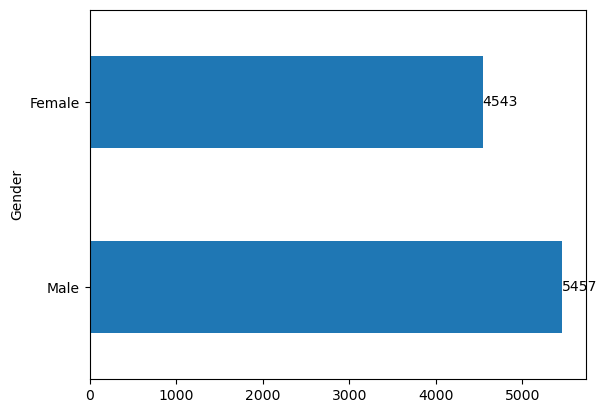

In [48]:
ax= tb_new.Gender.value_counts().plot(kind='barh')
ax.bar_label(ax.containers[0])

[Text(0, 0, '5014'), Text(0, 0, '2509'), Text(0, 0, '2477')]

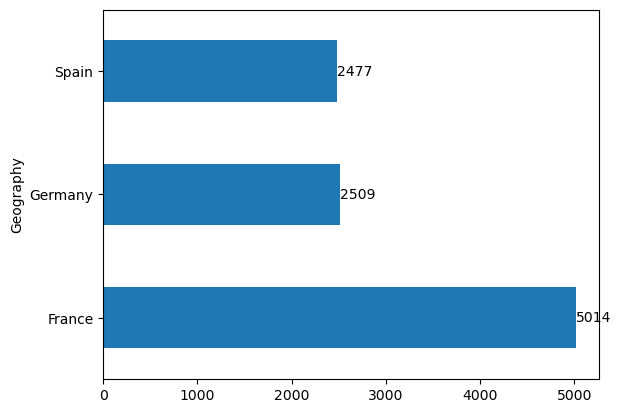

In [49]:
ax= tb_new.Geography.value_counts().plot(kind='barh')
ax.bar_label(ax.containers[0])

In [50]:
tb_new.Geography.value_counts()/len(tb_new.Geography)*100

Geography
France     50.14
Germany    25.09
Spain      24.77
Name: count, dtype: float64

No Significnce of Gender but we have huge Market size in France then equaly in Germany, France

# Univariate analysis

In [126]:
tb_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Geography       10000 non-null  object
 1   Gender          10000 non-null  object
 2   Exited          10000 non-null  int64 
 3   IsActiveMember  10000 non-null  int64 
 4   Gender_label    10000 non-null  int32 
dtypes: int32(1), int64(2), object(2)
memory usage: 351.7+ KB


In [63]:
tb_new=tb[['Geography','Gender','Exited','IsActiveMember']]

In [57]:
tb.CustomerId.duplicated().sum()
pd.merge(tb_new,tb on=[..])

0

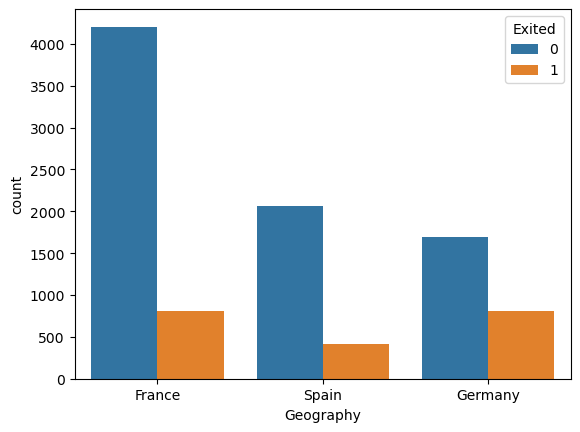

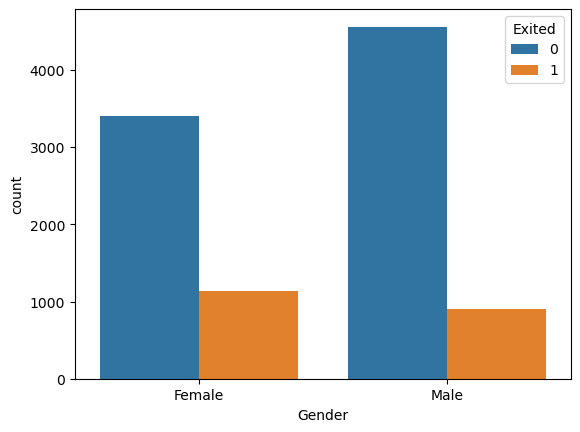

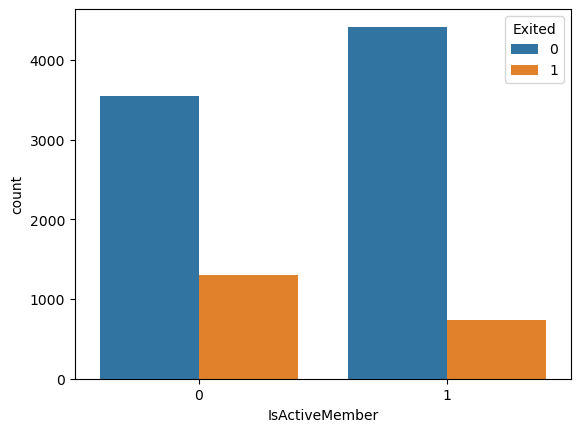

In [64]:
for i, ax in enumerate(tb_new.drop(columns='Exited')):
    plt.figure()
    sb.countplot(data=tb_new, x=ax, hue='Exited') #hue is the dependent variable y whereas x is categorical column

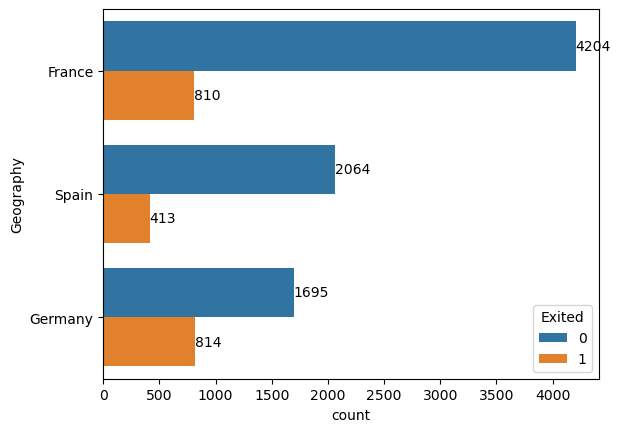

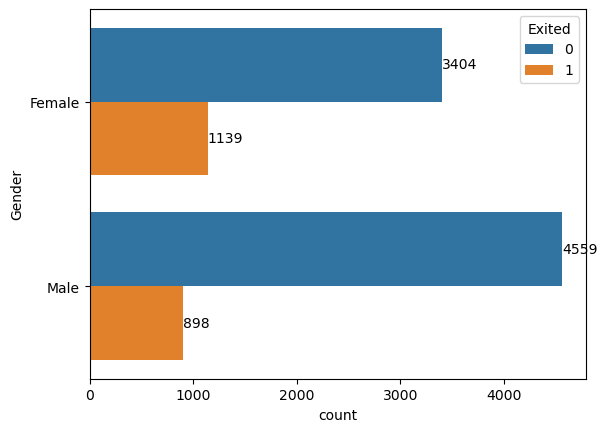

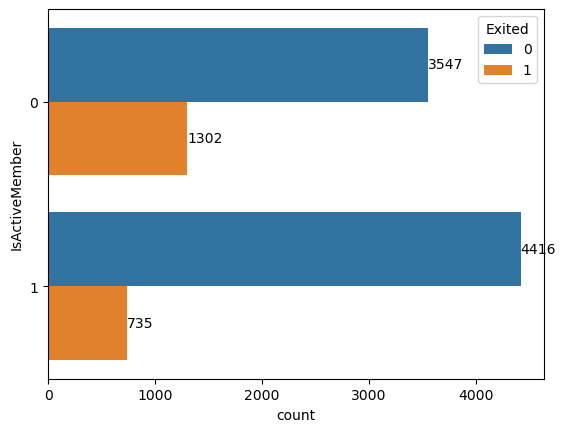

In [65]:
for col in tb_new.drop(columns='Exited'):
    plt.figure()
    # use ax to store the Axes objects
    ax = sb.countplot(data=tb_new, y=col, hue='Exited')
    # get the container object of the bars
    containers = ax.containers
    # inside loop through the containers and add labels to each bar#iterate through the BarContainer objects in the containers list. 
    for c in containers:
    #   print(c)
        ax.bar_label(c)

In [71]:
Ger=814/(814+1695)
Sp=413/2477
print(Ger, Sp)

0.32443204463929853 0.1667339523617279


In [69]:
I_c=(1302/3547)*100
A_c=(735/4416)*100
print(I_c,A_c)
print((1/6)*100)

36.70707640259374 16.644021739130434
16.666666666666664


People in Germany is more likely(32%) to churn than Spain(16%)
Gender have not much impact or no conclusion from Gender alone is important 
Inactive members(1/3)=>28 7|21 are more likely to churn than Active members(1/6)=>28 4|24

In [67]:
for col in tb_new.drop(columns='Exited'):
    print(col)

Geography
Gender
IsActiveMember


# Bivariate analysis

<Axes: xlabel='Gender', ylabel='Count'>

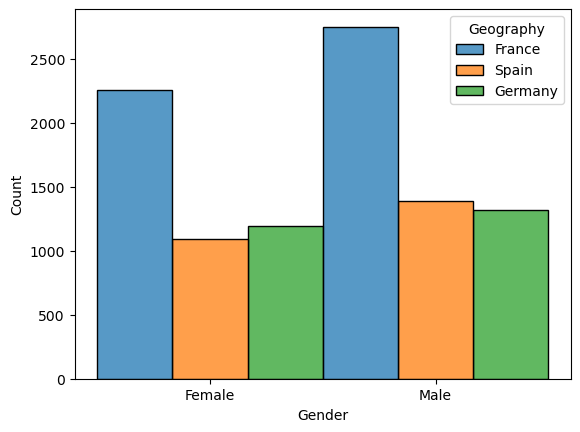

In [73]:
sb.histplot(data=tb_new, x='Gender', hue='Geography', multiple='dodge')

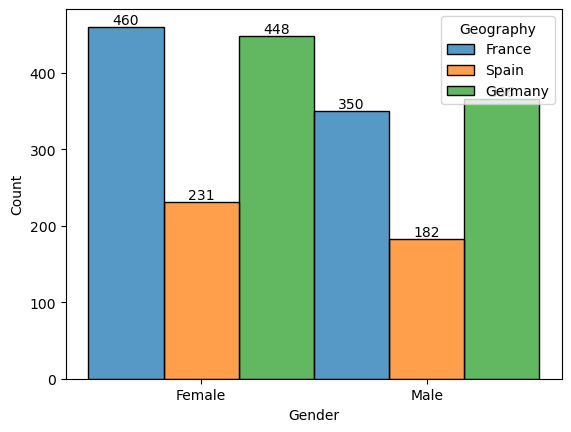

In [75]:
tb_new1= tb_new.loc[tb_new.Exited==1]
ax=sb.histplot(data=tb_new1, x='Gender', hue='Geography', multiple='dodge')
container=ax.containers
for c in container:
    ax.bar_label(c)

In [81]:
Tf=tb_new.Gender[tb_new['Gender']=='Female'].count()
Tm=tb_new.Gender[tb_new['Gender']=='Male'].count()
F=(460+231+448)/Tf
M=(350+182+370)/Tm
print(F*100, M*100)

25.071538630860662 16.529228513835438


Female are more churn than male for each regions|25%=1out4 female ratio is high out of female population, compared to men 16%=1out6

# Numerical analysis

In [100]:
#correlation plot :ranges -1 0 1

# select only the numeric columns
tb_numeric = tb.select_dtypes(np.number)

# compute the correlation matrix
tb_numeric.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


No of Products & Balance -vly corr while Age & Exited are -vly corr

In [120]:
tb_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Geography       10000 non-null  object
 1   Gender          10000 non-null  object
 2   Exited          10000 non-null  int64 
 3   IsActiveMember  10000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 312.6+ KB


In [84]:
tb.Age.unique().max()

92

In [112]:
tb['Age'].value_counts().sort_values(ascending=False)

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

In [87]:
bins=0,18,36,54,72,90,108
label=['18','36','54','72','90','108']
tb_new.Age_bin=pd.cut(tb.Age,bins,labels=label, include_lowest=True)

C:\Users\Lucky Prem\AppData\Local\Temp\ipykernel_21716\163923299.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  tb_new.Age_bin=pd.cut(tb.Age,bins,labels=label, include_lowest=True)


In [88]:
tb_new.Age_bin

0       54
1       54
2       54
3       54
4       54
        ..
9995    54
9996    36
9997    36
9998    54
9999    36
Name: Age, Length: 10000, dtype: category
Categories (6, object): ['18' < '36' < '54' < '72' < '90' < '108']

Axes(0.125,0.11;0.775x0.77)


Age,18,36,54,72,90,108
Exited,,,,,,
0,20,4189,3214,458,80,2
1,2,398,1295,339,3,0


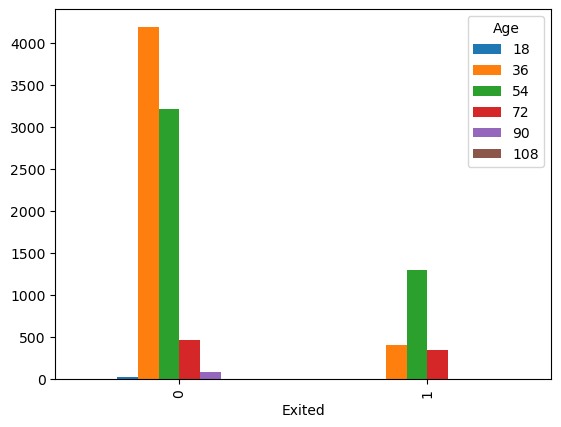

In [96]:
print(pd.crosstab(tb_new.Exited,tb_new.Age_bin).plot(kind='bar'))
pd.crosstab(tb_new.Exited,tb_new.Age_bin)

In [91]:
1295/3214
339/458

0.740174672489083

for age between 18 to 36, churn %age is less<10% while for above ages 36-54 & 54-72(Our Max Custumers), churn %age ratio is high 40% & 75% respectively then for old its again very less <1%

<Axes: xlabel='Age'>

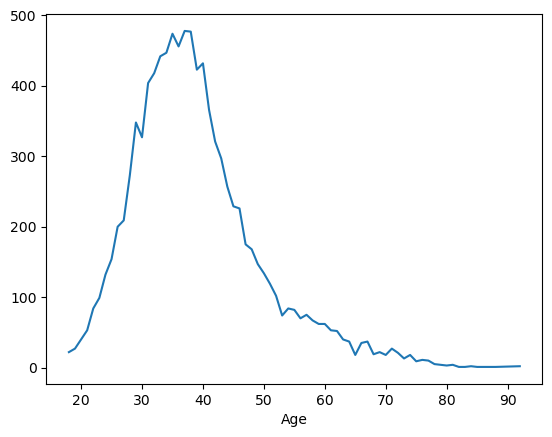

In [103]:
tb['Age'].value_counts().sort_index(ascending=True).plot()

<Axes: xlabel='Age'>

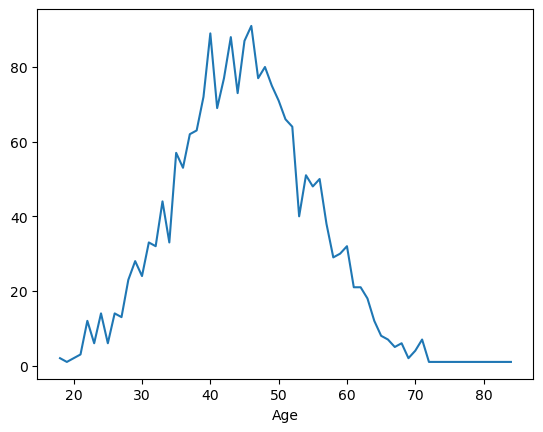

In [101]:
tb1=tb.loc[tb['Exited']==1]
tb1['Age'].value_counts().sort_index(ascending=True).plot()

<Axes: >

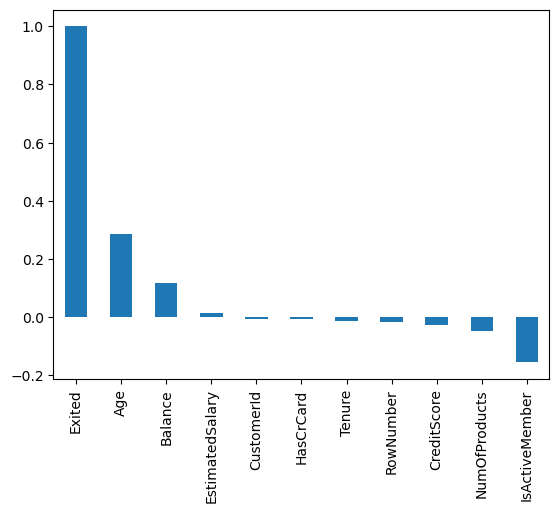

In [107]:
plt.figure()
tb_numeric.corr()['Exited'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

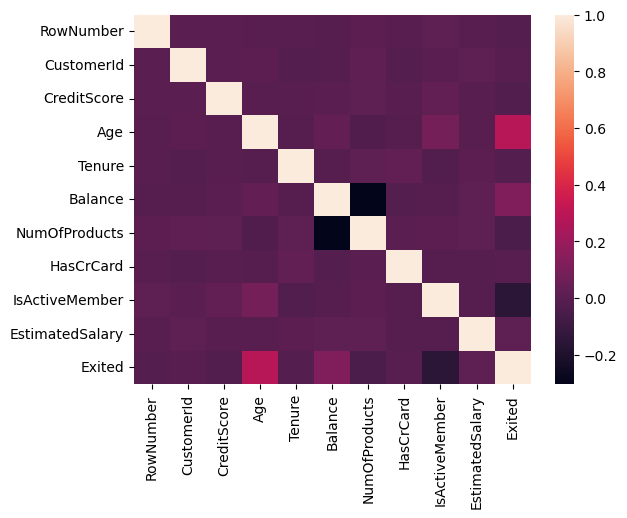

In [106]:
plt.figure()
sb.heatmap(tb_numeric.corr())

<Axes: >

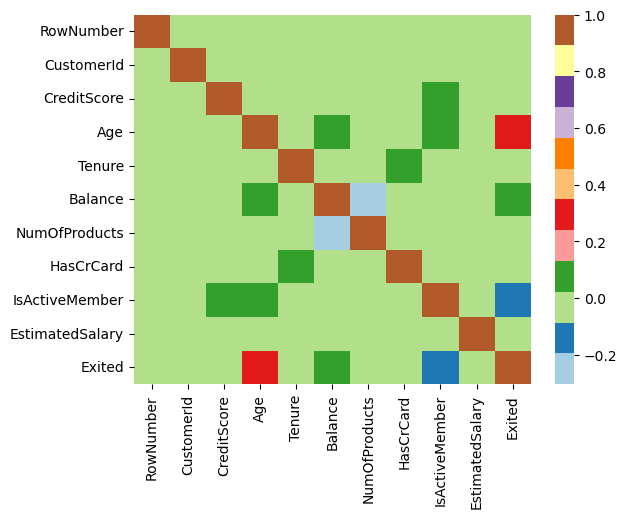

In [110]:
plt.figure()
sb.heatmap(tb_numeric.corr(), cmap='Paired')

C:\Users\Lucky Prem\AppData\Local\Temp\ipykernel_21716\2184071157.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tol=sb.kdeplot(tb, x=tb.Age[tb['Exited']==0], color='Blue', shade=True)
C:\Users\Lucky Prem\AppData\Local\Temp\ipykernel_21716\2184071157.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tol=sb.kdeplot(tb, x=tb.Age[tb.Exited==1], color='Red', shade=True)


Text(0.5, 1.0, 'Age by churn')

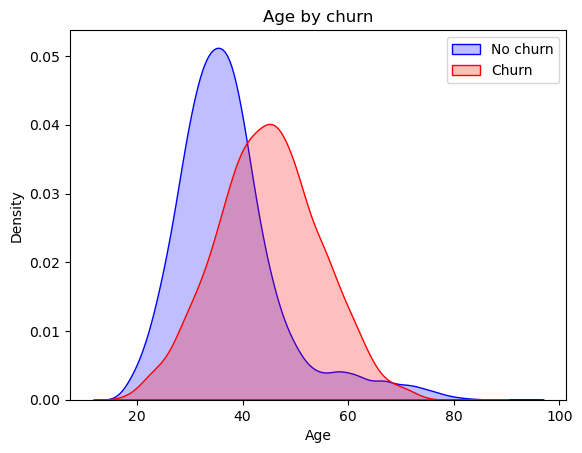

In [161]:
Tol=sb.kdeplot(tb, x=tb.Age[tb['Exited']==0], color='Blue', shade=True) 
Tol=sb.kdeplot(tb, x=tb.Age[tb.Exited==1], color='Red', shade=True)
Tol.legend(["No churn", "Churn"])
Tol.set_ylabel
Tol.set_xlabel
Tol.set_title('Age by churn')

Age is an important factor & the higher age people more likely to churning 

C:\Users\Lucky Prem\AppData\Local\Temp\ipykernel_21716\2592992489.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tol=sb.kdeplot(tb.Balance[tb['Exited']==0], color='Blue', shade=True)
C:\Users\Lucky Prem\AppData\Local\Temp\ipykernel_21716\2592992489.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tol=sb.kdeplot(tb.Balance[tb.Exited==1], color='Red', shade=True)


Text(0.5, 1.0, 'Balance by churn')

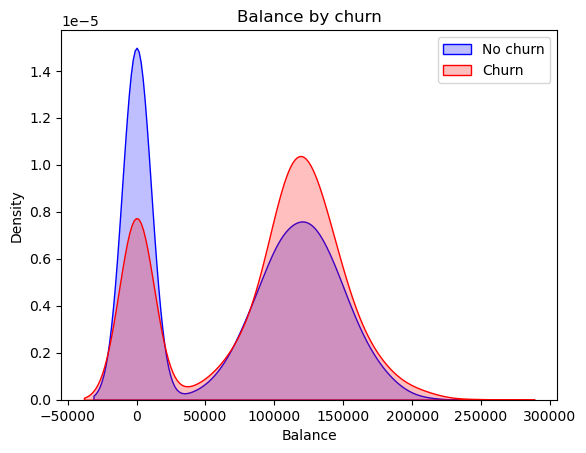

In [156]:
Tol=sb.kdeplot(tb.Balance[tb['Exited']==0], color='Blue', shade=True) 
Tol=sb.kdeplot(tb.Balance[tb.Exited==1], color='Red', shade=True)
Tol.legend(["No churn", "Churn"])
Tol.set_ylabel
Tol.set_xlabel
Tol.set_title('Balance by churn')

less people churn having less amount <25k & high balance people >25K are churning more

# Convert the target variable into numerical attribute ie Exited or Churn | Label Encoding np.where(

In [124]:
import sklearn
from sklearn import preprocessing as pp

In [125]:
#as an eg Gender
#tb_new.Gender_label=np.where(tb_new.Gender=='Female',0,1)
le = pp.LabelEncoder()
tb_new['Gender_label']= le.fit_transform(tb_new['Gender'])
tb_new

C:\Users\Lucky Prem\AppData\Local\Temp\ipykernel_21716\3805105488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_new['Gender_label']= le.fit_transform(tb_new['Gender'])


,Geography,Gender,Exited,IsActiveMember,Gender_label
0,France,Female,1,1,0
1,Spain,Female,0,1,0
2,France,Female,1,0,0
3,France,Female,0,0,0
4,Spain,Female,0,1,0
...,...,...,...,...,...
9995,France,Male,0,0,1
9996,France,Male,0,1,1
9997,France,Female,1,1,0
9998,Germany,Male,1,0,1


# Convert the Categorical variable into numerical variables ie Geography | Onehot  encoding get_dummies

In [129]:
tb_new_dum= pd.get_dummies(tb_new.Geography, dtype='int')

In [146]:
tb_new_dum
tb_new_dum=pd.concat([tb_new,tb_new_dum],axis=1)

In [147]:
tb_new_dum

,Geography,Gender,Exited,IsActiveMember,Gender_label,France,Germany,Spain
0,France,Female,1,1,0,1,0,0
1,Spain,Female,0,1,0,0,0,1
2,France,Female,1,0,0,1,0,0
3,France,Female,0,0,0,1,0,0
4,Spain,Female,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
9995,France,Male,0,0,1,1,0,0
9996,France,Male,0,1,1,1,0,0
9997,France,Female,1,1,0,1,0,0
9998,Germany,Male,1,0,1,0,1,0


In [133]:
tb_new.Gender_label.corr(tb_new.IsActiveMember)
tb_new.Gender_label.corr(tb_new.Exited)

-0.10651248767347493

C:\Users\Lucky Prem\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


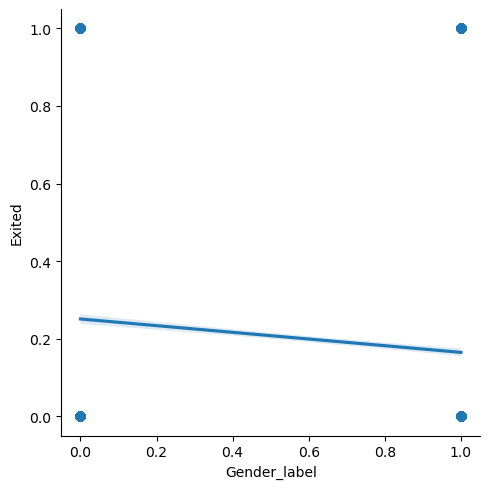

In [135]:
sb.lmplot(tb_new, x='Gender_label', y='Exited')

0 to 1 means from female to male as we go Exited/churn chances/numbers are decreseing which we already seen that Female are more churn than male 

<Axes: >

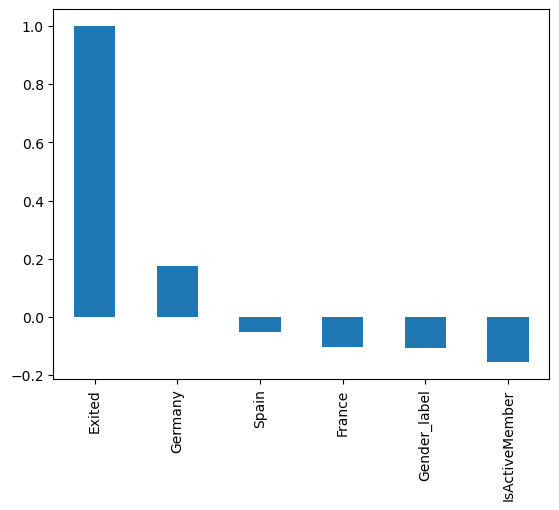

In [155]:
plt.figure()
tb_new_dum.select_dtypes(include='number').corr()['Exited'].sort_values(ascending=False).plot(kind='bar')

thats the same insight that Germany people will Churn more & France people are likely not
Also ActiveMember have -ve correlation with Exited means that more active members are not likely to Churn 

Active vs Inactive Gender distribution of Churned customers 

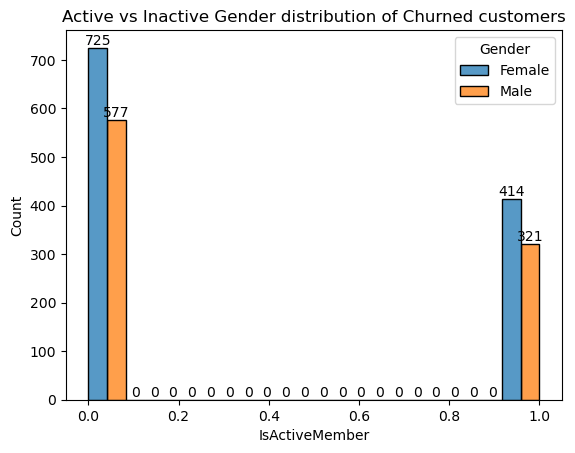

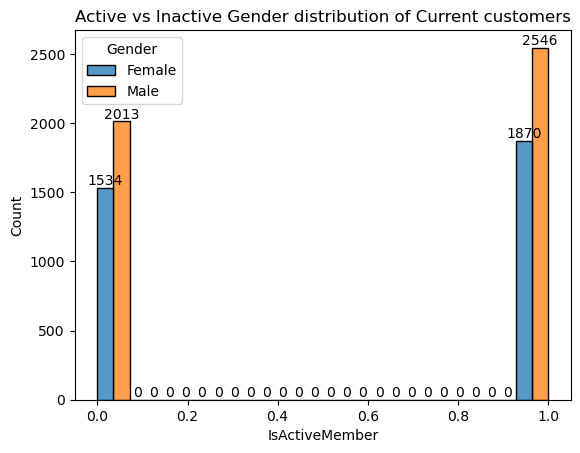

In [160]:
tb_new1= tb_new_dum.loc[tb_new_dum.Exited==1]
ax=sb.histplot(data=tb_new1, x='IsActiveMember', hue='Gender', multiple='dodge')
ax.set_title('Active vs Inactive Gender distribution of Churned customers')
container=ax.containers
for c in container:
    ax.bar_label(c)
plt.figure()
tb_new2= tb_new_dum.loc[tb_new_dum.Exited==0]
ax=sb.histplot(data=tb_new2, x='IsActiveMember', hue='Gender', multiple='dodge')
ax.set_title('Active vs Inactive Gender distribution of Current customers')
container=ax.containers
for c in container:
    ax.bar_label(c)

In [173]:
print(725/(725+415), 'C_InF')
print(577/(577+321), 'C_IM') #appox 64% inactive(both M&F), 36% active out of churnned

0.6359649122807017 C_InF
0.6425389755011136 C_IM


Churned: Female + Inactive customers are more churnning(~49%)
Current: More Active customers + Male are not or less churn chances(11%)

In [168]:
InM=557/(2013+557)
AM= 321/(321+2546)
AF= 414/(414+1870)
print(InM, AF, AM)

0.21673151750972763 0.18126094570928197 0.11196372514823857
